## Basic Information about the Data 

## Loading Bearing Data 

In [1]:
# Common Imports which will be used in the notebook
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os

# Test 1

In [2]:
# Here we are using the 1st test data
path = r'D:\project data\1st_test'

In [26]:
filename = '2003.10.22.12.06.24'
dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)
dataset=pd.read_csv(r'D:\project data\1st_test/2003.10.22.12.06.24', sep='\t',header=None)

In [27]:
dataset

,0,1,2,3,4,5,6,7
0,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
1,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122
2,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071
3,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078
4,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066
...,...,...,...,...,...,...,...,...
20475,-0.022,-0.142,0.085,-0.078,-0.200,-0.198,-0.134,-0.093
20476,0.024,-0.156,0.042,-0.039,-0.159,-0.071,-0.227,-0.132
20477,-0.193,-0.303,-0.071,-0.125,-0.237,-0.251,-0.151,0.007
20478,-0.115,0.076,-0.078,-0.332,-0.027,-0.002,-0.151,-0.005


In [28]:
bearing_no=2

bearing_data = np.array(dataset.iloc[:,bearing_no+0:bearing_no+2])

bearing_data

array([[-0.183, -0.054],
       [-0.164, -0.183],
       [-0.195, -0.125],
       ...,
       [-0.071, -0.125],
       [-0.078, -0.332],
       [ 0.103, -0.059]])

In [6]:
# Creation of feature extraction matrix to store features of bearing data
feature_matrix=np.zeros((1,9))
feature_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

We will calculate following time domain features.

1. Maximum value
2. Minimum value
3. Mean value
4. Standard deviation (Unbiased std)
5. Root mean square value (RMS)
6. Skewness
7. Kurtosis
8. Crest factor = Max/RMS
9. Form factor =  RMS/Mean

In [7]:
def compute_skewness(x):
    
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [8]:
def compute_kurtosis(x):
    
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [29]:
temp = bearing_data
feature_matrix[0,0] = np.max(temp)
feature_matrix[0,1] = np.min(temp)
feature_matrix[0,2] = np.mean(temp)
feature_matrix[0,3] = np.std(temp, ddof = 1)
feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
feature_matrix[0,5] = compute_skewness(temp)
feature_matrix[0,6] = compute_kurtosis(temp)
feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]

In [30]:
feature_matrix

array([[ 0.359     , -0.674     , -0.09378401,  0.0843352 ,  0.1261257 ,
        -0.15597817,  3.63267489,  2.84636676, -1.34485294]])

Note that the features are for 1 second data of bearing 1 only. We can similarly extract features of any bearing at any point of time.

In [40]:
Time_feature_matrix=pd.DataFrame()

test_set=1

bearing_no=4 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'1st_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no+2:bearing_no+4])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = pd.concat((Time_feature_matrix , df), axis = 0)

In [41]:
Time_feature_matrix

,0,1,2,3,4,5,6,7,8
2003.10.22.12.06,0.374,-0.471,-0.092602,0.063332,0.112187,0.033994,5.884049,3.333706,-1.211502
2003.10.22.12.09,0.376,-0.627,-0.089603,0.062162,0.109054,0.027286,6.264429,3.447839,-1.217077
2003.10.22.12.14,0.376,-0.601,-0.092852,0.062668,0.112020,0.059583,5.497612,3.356535,-1.206445
2003.10.22.12.19,0.327,-0.525,-0.093364,0.063190,0.112738,-0.006228,5.259132,2.900539,-1.207502
2003.10.22.12.24,0.349,-0.522,-0.092986,0.062866,0.112242,0.039793,5.426445,3.109343,-1.207094
...,...,...,...,...,...,...,...,...,...
2003.11.25.16.07,0.635,-0.908,-0.114390,0.164506,0.200366,-0.005940,4.419784,3.169201,-1.751607
2003.11.25.23.13,0.894,-1.047,-0.113495,0.180980,0.213622,-0.124698,4.271938,4.184965,-1.882209
2003.11.25.23.19,0.879,-1.091,-0.115132,0.189539,0.221765,-0.158009,4.615180,3.963657,-1.926173
2003.11.25.23.29,0.686,-1.157,-0.115472,0.176592,0.210993,-0.064223,4.248534,3.251300,-1.827221


In [42]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))

Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2003-10-22 12:06:00,0.374,-0.471,-0.092602,0.063332,0.112187,0.033994,5.884049,3.333706,-1.211502
2003-10-22 12:09:00,0.376,-0.627,-0.089603,0.062162,0.109054,0.027286,6.264429,3.447839,-1.217077
2003-10-22 12:14:00,0.376,-0.601,-0.092852,0.062668,0.112020,0.059583,5.497612,3.356535,-1.206445
2003-10-22 12:19:00,0.327,-0.525,-0.093364,0.063190,0.112738,-0.006228,5.259132,2.900539,-1.207502
2003-10-22 12:24:00,0.349,-0.522,-0.092986,0.062866,0.112242,0.039793,5.426445,3.109343,-1.207094
...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:00,0.635,-0.908,-0.114390,0.164506,0.200366,-0.005940,4.419784,3.169201,-1.751607
2003-11-25 23:13:00,0.894,-1.047,-0.113495,0.180980,0.213622,-0.124698,4.271938,4.184965,-1.882209
2003-11-25 23:19:00,0.879,-1.091,-0.115132,0.189539,0.221765,-0.158009,4.615180,3.963657,-1.926173
2003-11-25 23:29:00,0.686,-1.157,-0.115472,0.176592,0.210993,-0.064223,4.248534,3.251300,-1.827221


# Test-1 Bearing Dataset Visualization

In [71]:
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_1.csv")
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_1.csv",index_col='Unnamed: 0')
df1.index = pd.to_datetime(df1.index)
df1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2003-10-22 12:06:00,0.701,-0.720,-0.094236,0.076067,0.121106,0.136104,6.781065,5.788326,-1.285127
2003-10-22 12:09:00,0.581,-0.654,-0.094397,0.074692,0.120372,0.012072,6.105981,4.826686,-1.275174
2003-10-22 12:14:00,0.549,-0.623,-0.096025,0.075034,0.121864,0.067107,5.858302,4.505033,-1.269086
2003-10-22 12:19:00,0.535,-0.598,-0.095460,0.076196,0.122140,0.086053,5.739395,4.380210,-1.279496
2003-10-22 12:24:00,0.388,-0.623,-0.095314,0.077253,0.122689,0.007836,5.406455,3.162464,-1.287210
...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:00,0.491,-0.669,-0.117679,0.111065,0.161813,0.049334,4.166748,3.034358,-1.375039
2003-11-25 23:13:00,0.657,-0.803,-0.116975,0.118583,0.166567,-0.034480,4.563287,3.944348,-1.423959
2003-11-25 23:19:00,0.564,-0.710,-0.117724,0.117260,0.166158,-0.084696,4.127988,3.394356,-1.411420
2003-11-25 23:29:00,0.637,-0.776,-0.118584,0.116973,0.166567,0.016083,4.264643,3.824292,-1.404629


In [72]:
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_1.csv",index_col='Unnamed: 0')
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_1.csv",index_col='Unnamed: 0')
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_1.csv",index_col='Unnamed: 0')
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_1.csv",index_col='Unnamed: 0')

In [73]:
df1.index = pd.to_datetime(df1.index)
df2

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2003-10-22 12:06:00,0.359,-0.674,-0.093784,0.084335,0.126126,-0.155978,3.632675,2.846367,-1.344853
2003-10-22 12:09:00,0.291,-0.645,-0.095348,0.083773,0.126921,-0.155353,3.670697,2.292761,-1.331138
2003-10-22 12:14:00,0.339,-0.613,-0.096393,0.083924,0.127807,-0.134900,3.547382,2.652439,-1.325900
2003-10-22 12:19:00,0.286,-0.598,-0.095876,0.083684,0.127259,-0.170195,3.639657,2.247377,-1.327337
2003-10-22 12:24:00,0.349,-0.725,-0.095590,0.082703,0.126401,-0.152735,3.735610,2.761056,-1.322320
...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:00,0.518,-0.781,-0.117051,0.133263,0.177368,0.018341,4.018563,2.920484,-1.515308
2003-11-25 23:13:00,0.547,-0.830,-0.116493,0.153888,0.193007,0.013152,3.744420,2.834101,-1.656802
2003-11-25 23:19:00,0.728,-0.869,-0.118246,0.160951,0.199717,0.035460,4.011419,3.645161,-1.688990
2003-11-25 23:29:00,0.488,-0.991,-0.118201,0.152066,0.192601,-0.050243,3.483482,2.533741,-1.629435


In [74]:
df1.index = pd.to_datetime(df1.index)
df3

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2003-10-22 12:06:00,0.415,-0.784,-0.090846,0.093496,0.130362,0.008408,4.227524,3.183435,-1.434978
2003-10-22 12:09:00,0.493,-0.576,-0.091924,0.093069,0.130811,-0.029794,4.147429,3.768783,-1.423045
2003-10-22 12:14:00,0.386,-0.620,-0.094188,0.092942,0.132323,0.071090,4.161681,2.917099,-1.404883
2003-10-22 12:19:00,0.352,-0.684,-0.092957,0.094469,0.132534,-0.031116,3.977367,2.655926,-1.425747
2003-10-22 12:24:00,0.471,-0.623,-0.093597,0.093501,0.132298,0.000003,3.818254,3.560153,-1.413484
...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:00,3.037,-2.788,-0.114921,0.254636,0.279365,0.025423,9.345766,10.871085,-2.430935
2003-11-25 23:13:00,4.998,-5.000,-0.112556,0.462557,0.476049,-0.103084,22.625945,10.498929,-4.229433
2003-11-25 23:19:00,4.902,-5.000,-0.110237,0.499319,0.511337,0.131978,21.983079,9.586639,-4.638524
2003-11-25 23:29:00,4.316,-4.875,-0.115955,0.452091,0.466719,-0.221033,18.476422,9.247528,-4.025006


In [75]:
df1.index = pd.to_datetime(df1.index)
df4

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2003-10-22 12:06:00,0.374,-0.471,-0.092602,0.063332,0.112187,0.033994,5.884049,3.333706,-1.211502
2003-10-22 12:09:00,0.376,-0.627,-0.089603,0.062162,0.109054,0.027286,6.264429,3.447839,-1.217077
2003-10-22 12:14:00,0.376,-0.601,-0.092852,0.062668,0.112020,0.059583,5.497612,3.356535,-1.206445
2003-10-22 12:19:00,0.327,-0.525,-0.093364,0.063190,0.112738,-0.006228,5.259132,2.900539,-1.207502
2003-10-22 12:24:00,0.349,-0.522,-0.092986,0.062866,0.112242,0.039793,5.426445,3.109343,-1.207094
...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:00,0.635,-0.908,-0.114390,0.164506,0.200366,-0.005940,4.419784,3.169201,-1.751607
2003-11-25 23:13:00,0.894,-1.047,-0.113495,0.180980,0.213622,-0.124698,4.271938,4.184965,-1.882209
2003-11-25 23:19:00,0.879,-1.091,-0.115132,0.189539,0.221765,-0.158009,4.615180,3.963657,-1.926173
2003-11-25 23:29:00,0.686,-1.157,-0.115472,0.176592,0.210993,-0.064223,4.248534,3.251300,-1.827221


# Visualizing The Bearing Data

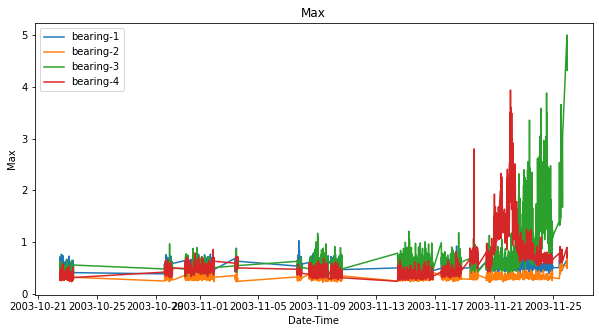

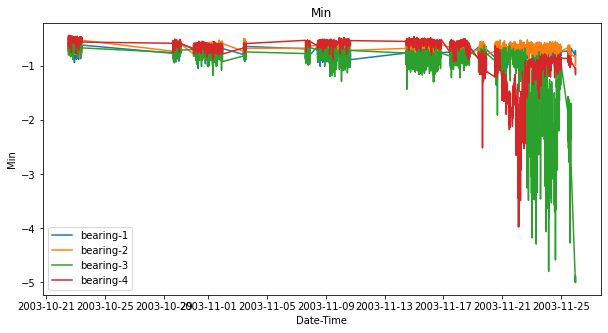

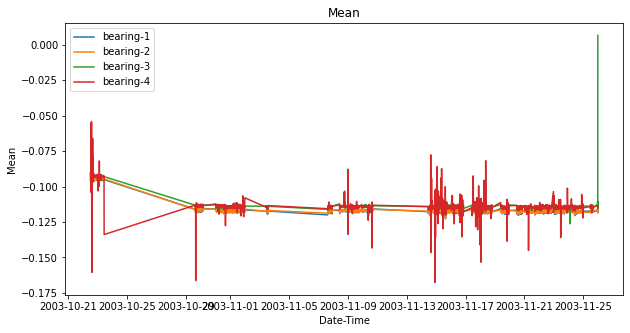

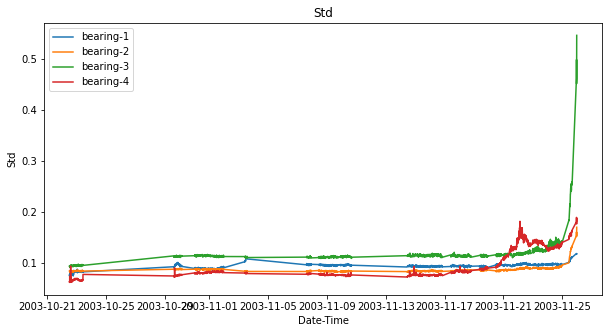

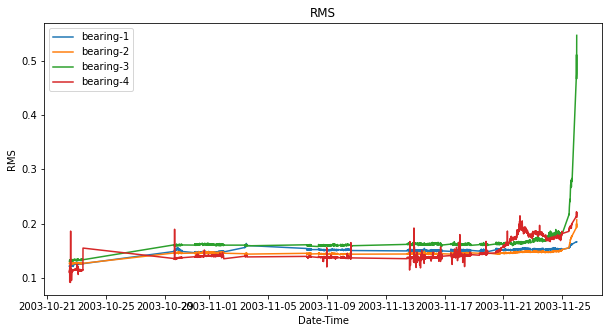

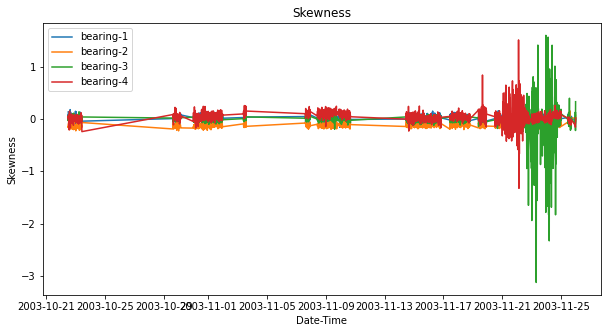

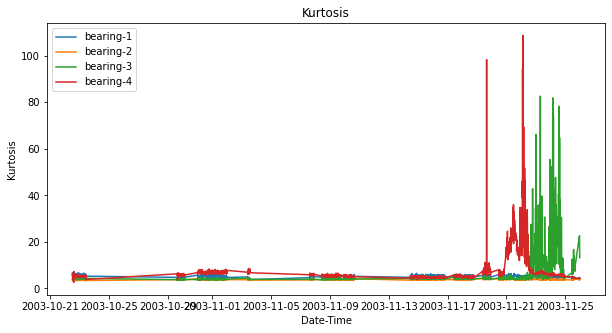

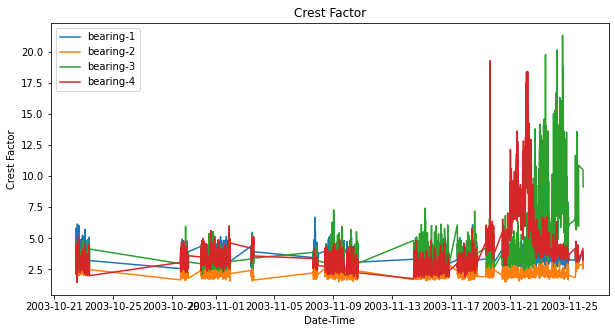

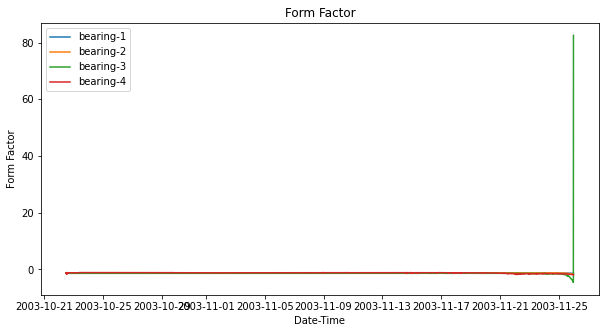

In [76]:
for i,col in enumerate(df1.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

# Saving Inner race fault

In [49]:
df_irf=df3['2003-11-21 00:32:00':'2003-11-24 18:22:00']
fault=[]
for i in range (0,len(df_irf)):
    fault.append('Inner Race fault')

df_irf['Fault']=fault

df_irf.to_csv('inner_race_fault.csv',index=False)
df_irf

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\1291167817.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_irf['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2003-11-21 00:34:00,0.427,-0.957,-0.114544,0.114860,0.162212,0.012648,4.174285,2.632356,-1.416159,Inner Race fault
2003-11-21 00:44:00,0.630,-0.854,-0.114133,0.114467,0.161644,-0.023019,4.360105,3.897460,-1.416272,Inner Race fault
2003-11-21 00:54:00,0.645,-0.718,-0.113959,0.114801,0.161758,0.073040,3.947496,3.987435,-1.419438,Inner Race fault
2003-11-21 01:04:00,0.815,-0.750,-0.114464,0.112841,0.160732,0.020532,4.516740,5.070541,-1.404215,Inner Race fault
2003-11-21 01:14:00,0.723,-0.728,-0.115217,0.116000,0.163495,-0.045946,4.338510,4.422146,-1.419020,Inner Race fault
...,...,...,...,...,...,...,...,...,...,...
2003-11-24 17:37:00,0.786,-1.250,-0.115377,0.138017,0.179889,-0.116339,5.248243,4.369366,-1.559138,Inner Race fault
2003-11-24 17:47:00,2.422,-2.920,-0.114484,0.147451,0.186676,-0.351744,30.478306,12.974347,-1.630583,Inner Race fault
2003-11-24 17:57:00,1.465,-1.660,-0.113358,0.144960,0.184019,0.094072,9.968951,7.961141,-1.623345,Inner Race fault
2003-11-24 18:07:00,1.123,-2.158,-0.114316,0.138724,0.179755,0.017244,8.632450,6.247389,-1.572446,Inner Race fault


# Saving Roller Element fault

In [50]:
df_ref=df4['2003-11-21 00:32:00':'2003-11-24 18:22:00']
fault=[]
for i in range (0,len(df_ref)):
    fault.append('Roller Element')

df_ref['Fault']=fault

df_ref.to_csv('roller_element_fault.csv',index=False)
df_ref

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\2704407612.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2003-11-21 00:34:00,1.282,-1.396,-0.114328,0.106072,0.155955,0.113013,15.298812,8.220328,-1.364103,Roller Element
2003-11-21 00:44:00,1.152,-1.243,-0.113893,0.109641,0.158090,0.107068,16.482008,7.286992,-1.388057,Roller Element
2003-11-21 00:54:00,1.926,-1.270,-0.113591,0.110723,0.158626,0.327427,21.677012,12.141750,-1.396466,Roller Element
2003-11-21 01:04:00,0.945,-1.147,-0.114470,0.105724,0.155822,-0.216316,13.252367,6.064602,-1.361251,Roller Element
2003-11-21 01:14:00,1.096,-1.228,-0.117035,0.109081,0.159986,0.057868,14.443085,6.850593,-1.366994,Roller Element
...,...,...,...,...,...,...,...,...,...,...
2003-11-24 17:37:00,0.701,-0.879,-0.114270,0.134435,0.176437,0.128028,5.571185,3.973088,-1.544034,Roller Element
2003-11-24 17:47:00,0.618,-0.898,-0.114284,0.131464,0.174193,0.060432,5.665486,3.547783,-1.524215,Roller Element
2003-11-24 17:57:00,0.669,-0.933,-0.113584,0.131129,0.173482,0.061219,5.727126,3.856318,-1.527338,Roller Element
2003-11-24 18:07:00,0.752,-0.872,-0.114359,0.132172,0.174777,0.098738,5.294448,4.302622,-1.528320,Roller Element


# Test 2

In [77]:
# Here we are using the 2nd test data
path = r'D:\project data\2nd_test'

In [78]:
filename = '2004.02.12.10.32.39'
dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)
dataset=pd.read_csv(r'D:\project data\2nd_test/2004.02.12.10.32.39', sep='\t',header=None)

In [79]:
dataset

,0,1,2,3
0,-0.049,-0.071,-0.132,-0.010
1,-0.042,-0.073,-0.007,-0.105
2,0.015,0.000,0.007,0.000
3,-0.051,0.020,-0.002,0.100
4,-0.107,0.010,0.127,0.054
...,...,...,...,...
20475,0.049,-0.051,-0.039,-0.044
20476,0.037,0.061,0.115,0.007
20477,-0.012,0.007,0.056,-0.007
20478,-0.012,0.093,0.017,-0.044


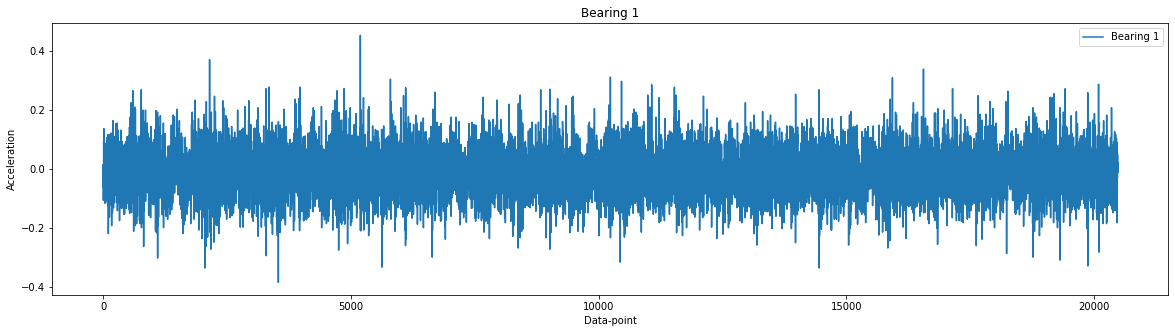

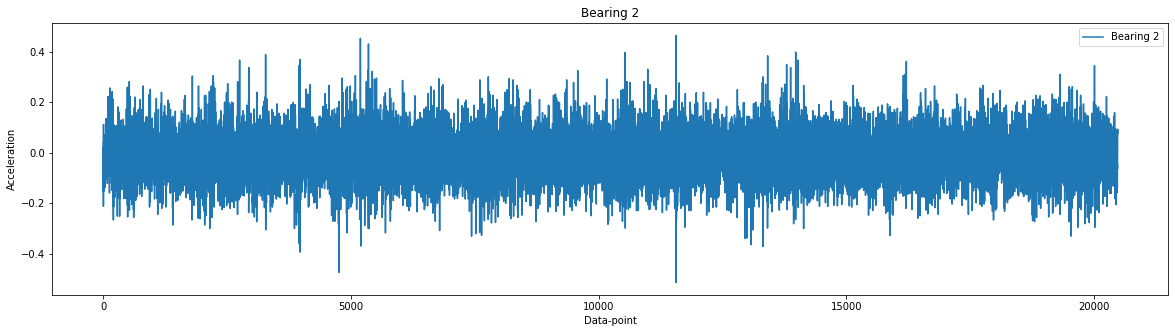

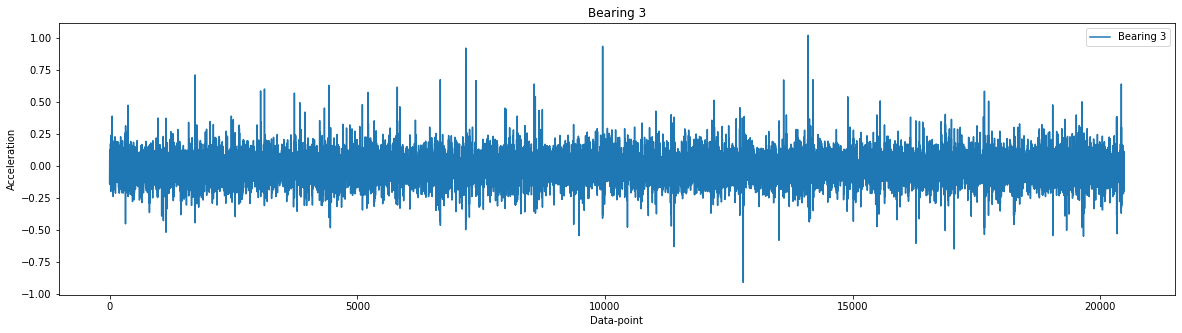

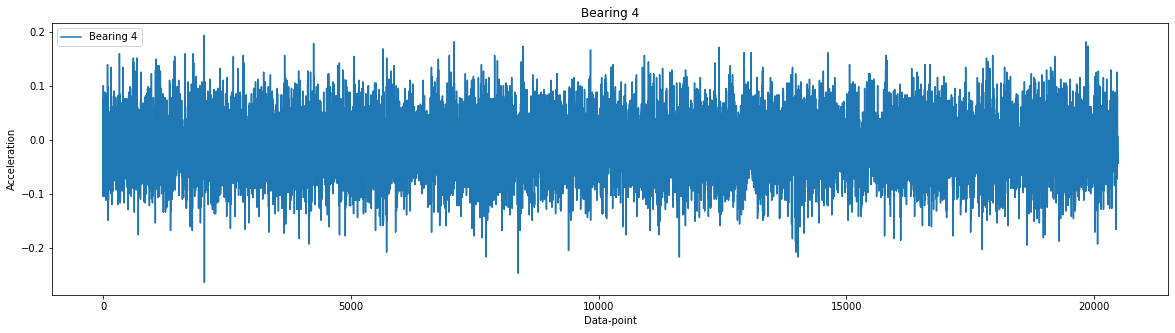

In [80]:
# Plotting the 1 second acceleration data for all the 4 bearings
for i in [0,1,2,3]:
    
    df_bearing=np.array(dataset.iloc[:,i])
    
    plt.figure(figsize=(20, 5))
    plt.plot(df_bearing)

    plt.legend(['Bearing {}'.format(i+1)])

    plt.xlabel("Data-point")
    plt.ylabel("Acceleration")
    plt.title('Bearing {}'.format(i+1))
    plt.show()

In [81]:
bearing_no=1

bearing_data = np.array(dataset.iloc[:,bearing_no-1])

bearing_data

array([-0.049, -0.042,  0.015, ..., -0.012, -0.012,  0.02 ])

In [82]:
# Creation of feature extraction matrix to store features of bearing data
feature_matrix=np.zeros((1,9))
feature_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [83]:
def compute_skewness(x):
    
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [84]:
temp = bearing_data
feature_matrix[0,0] = np.max(temp)
feature_matrix[0,1] = np.min(temp)
feature_matrix[0,2] = np.mean(temp)
feature_matrix[0,3] = np.std(temp, ddof = 1)
feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
feature_matrix[0,5] = compute_skewness(temp)
feature_matrix[0,6] = compute_kurtosis(temp)
feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]

In [85]:
feature_matrix

array([[ 0.454     , -0.386     , -0.010196  ,  0.07347672,  0.074179  ,
         0.08398728,  0.62840828,  6.12033067, -7.27530669]])

In [86]:
Time_feature_matrix=pd.DataFrame()

test_set=2

bearing_no=1 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'D:\project data\2nd_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = Time_feature_matrix.append(df)

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\836080382.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_

In [87]:
Time_feature_matrix

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307
2004.02.12.10.42,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382
2004.02.12.10.52,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508
2004.02.12.11.02,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
2004.02.12.11.12,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004.02.19.05.42,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419
2004.02.19.05.52,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656
2004.02.19.06.02,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983
2004.02.19.06.12,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578


In [88]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

#Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))

Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578


In [89]:
Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))

# Test-2 Bearing Dataset Visualization

In [90]:
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_2.csv")
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_2.csv",index_col='Unnamed: 0')
df1.index = pd.to_datetime(df1.index)
df1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578


In [91]:
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_2.csv",index_col='Unnamed: 0')
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_2.csv",index_col='Unnamed: 0')
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_2.csv",index_col='Unnamed: 0')
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_2.csv",index_col='Unnamed: 0')

In [92]:
df1.index = pd.to_datetime(df1.index)
df1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578


In [93]:
df1.index = pd.to_datetime(df1.index)
df2

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.464,-0.513,-0.012695,0.090056,0.090944,0.126906,0.506458,5.102047,-7.163773
2004-02-12 10:42:00,0.457,-0.481,-0.002561,0.093386,0.093419,0.070083,0.252696,4.891944,-36.478394
2004-02-12 10:52:00,0.491,-0.503,-0.001695,0.093705,0.093718,0.096575,0.310466,5.239127,-55.275827
2004-02-12 11:02:00,0.569,-0.474,-0.002393,0.092919,0.092947,0.105826,0.235025,6.121762,-38.844130
2004-02-12 11:12:00,0.452,-0.486,-0.001559,0.095338,0.095348,0.097958,0.225994,4.740531,-61.158395
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,1.118,-0.884,-0.000838,0.218298,0.218294,0.641960,2.452206,5.121522,-260.558973
2004-02-19 05:52:00,0.908,-0.637,-0.000910,0.170819,0.170817,0.464408,0.910876,5.315634,-187.799539
2004-02-19 06:02:00,0.891,-0.752,-0.001632,0.193639,0.193641,0.386833,0.330302,4.601296,-118.636161
2004-02-19 06:12:00,0.007,0.000,0.003731,0.001490,0.004018,-0.289618,-1.871150,1.742236,1.076734


In [94]:
df1.index = pd.to_datetime(df1.index)
df3

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,1.023,-0.911,-0.014541,0.108436,0.109404,0.204825,3.212468,9.350652,-7.523856
2004-02-12 10:42:00,0.752,-0.681,-0.002461,0.109792,0.109817,-0.023852,1.394821,6.847735,-44.626842
2004-02-12 10:52:00,0.933,-0.786,-0.001595,0.109852,0.109861,0.056557,2.639397,8.492546,-68.858586
2004-02-12 11:02:00,1.016,-0.935,-0.003148,0.110624,0.110667,0.033548,2.682224,9.180734,-35.155121
2004-02-12 11:12:00,0.745,-0.771,-0.001158,0.107502,0.107506,-0.002892,1.577948,6.929872,-92.797551
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,0.686,-0.769,-0.001911,0.170570,0.170577,-0.011975,-0.098321,4.021649,-89.261120
2004-02-19 05:52:00,0.764,-0.725,-0.001348,0.177877,0.177878,0.111051,-0.319468,4.295083,-131.961801
2004-02-19 06:02:00,0.845,-0.784,-0.001365,0.187405,0.187405,0.247077,-0.135942,4.508940,-137.245256
2004-02-19 06:12:00,0.007,0.000,0.003656,0.001496,0.003950,-0.196107,-1.935522,1.772075,1.080519


In [95]:
df1.index = pd.to_datetime(df1.index)
df4

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.193,-0.264,-0.010026,0.053168,0.054103,-0.022078,0.065660,3.567239,-5.396329
2004-02-12 10:42:00,0.249,-0.229,-0.003784,0.055974,0.056101,0.001582,0.107236,4.438435,-14.827018
2004-02-12 10:52:00,0.354,-0.334,-0.003485,0.056038,0.056145,0.070444,0.256918,6.305078,-16.108911
2004-02-12 11:02:00,0.513,-0.525,-0.003741,0.056686,0.056807,-0.036324,0.805818,9.030509,-15.186020
2004-02-12 11:12:00,0.244,-0.212,-0.002703,0.056778,0.056841,0.019006,0.138647,4.292680,-21.032042
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,0.542,-0.544,-0.002939,0.148326,0.148351,-0.051945,-0.093570,3.653494,-50.473985
2004-02-19 05:52:00,0.527,-0.449,-0.003315,0.116586,0.116630,0.119884,0.259273,4.518571,-35.180992
2004-02-19 06:02:00,0.625,-0.479,-0.003311,0.130544,0.130582,0.167966,0.696806,4.786252,-39.440269
2004-02-19 06:12:00,0.005,-0.002,0.001786,0.001204,0.002154,0.656632,1.652267,2.321622,1.206167


# Visualizing The Bearing Data

In [96]:
df1.columns

Index(['Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness', 'Kurtosis',
       'Crest Factor', 'Form Factor'],
      dtype='object')

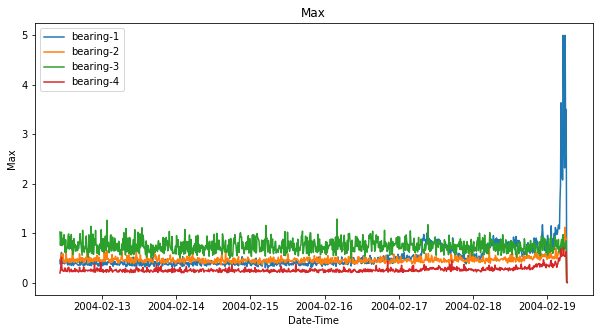

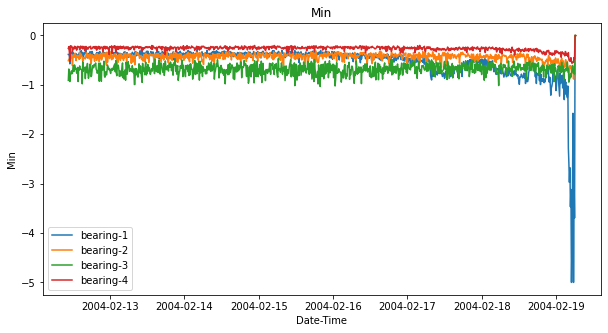

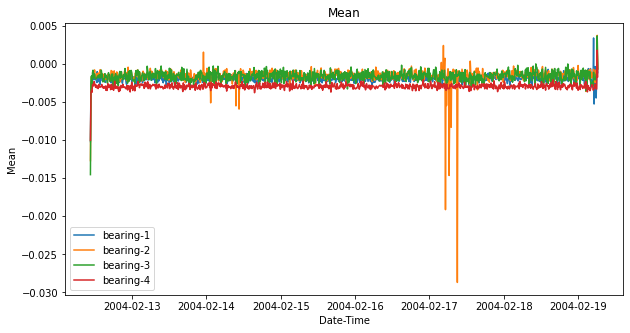

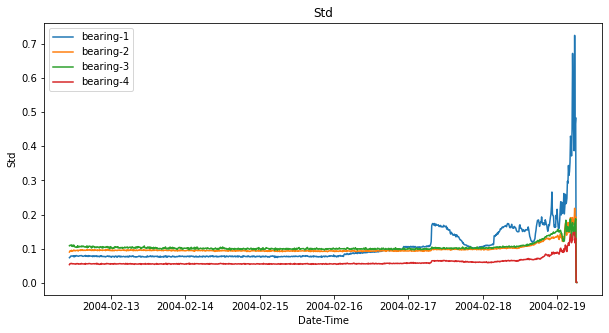

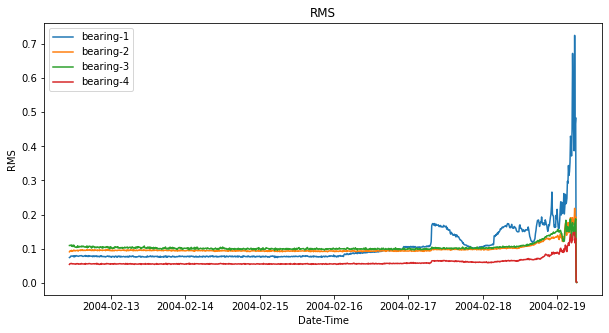

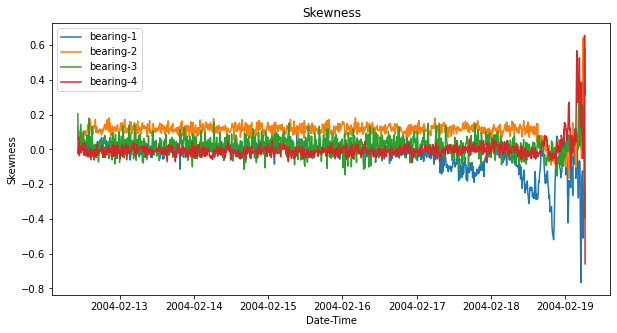

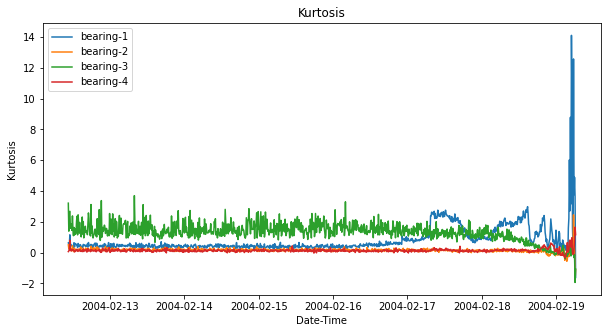

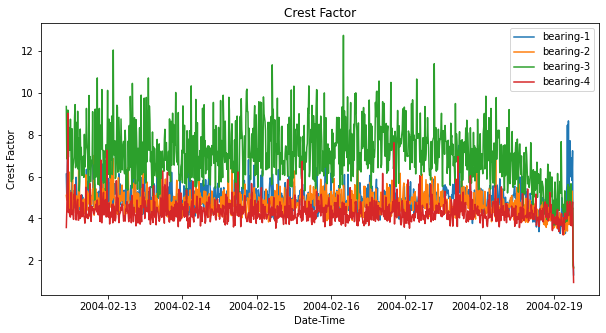

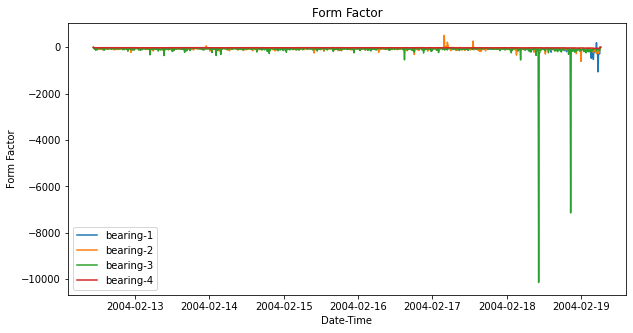

In [97]:
for col in (df1.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

# Saving the Outer Race Fault

In [98]:
df=df1['2004-02-18 00:32:00':'2004-02-19 06:22:00']

In [99]:
fault=[]
for i in range (0,len(df)):
    fault.append('Outer Race fault')

df['Fault']=fault
df    

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\4240142619.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-02-18 00:32:00,0.481,-0.645,-0.002109,0.108896,0.108914,0.043103,1.006777,4.416327,-51.634520,Outer Race fault
2004-02-18 00:42:00,0.508,-0.537,-0.002089,0.107409,0.107426,0.026895,0.906887,4.728821,-51.417228,Outer Race fault
2004-02-18 00:52:00,0.554,-0.540,-0.001542,0.108719,0.108727,0.080662,1.060355,5.095329,-70.501831,Outer Race fault
2004-02-18 01:02:00,0.591,-0.461,-0.002320,0.110181,0.110203,0.047596,1.030171,5.362826,-47.495934,Outer Race fault
2004-02-18 01:12:00,0.498,-0.630,-0.002595,0.109821,0.109849,-0.018425,0.916053,4.533508,-42.336963,Outer Race fault
...,...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419,Outer Race fault
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656,Outer Race fault
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983,Outer Race fault
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578,Outer Race fault


In [100]:
df.to_csv('outer_race_fault.csv',index=False)

# Saving the Normal Bearing data 

In [101]:
df=df1['2004-02-14 00:32:00':'2004-02-15 06:22:00']
fault=[]
for i in range (0,len(df)):
    fault.append('Normal')
    
df['Fault']=fault

df.to_csv('Normal.csv',index=False)    
    

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\1229958065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault']=fault


In [102]:
df=pd.read_csv('Normal.csv')
df


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0.435,-0.347,-0.001991,0.078193,0.078216,-0.007929,0.403351,5.561507,-39.290363,Normal
1,0.388,-0.342,-0.002211,0.077591,0.077620,0.025307,0.378781,4.998698,-35.109699,Normal
2,0.420,-0.420,-0.001653,0.077155,0.077171,0.026648,0.370972,5.442477,-46.672085,Normal
3,0.386,-0.444,-0.002093,0.077829,0.077855,0.016956,0.504732,4.957911,-37.197670,Normal
4,0.403,-0.308,-0.002283,0.076113,0.076145,0.009797,0.328286,5.292524,-33.349428,Normal
...,...,...,...,...,...,...,...,...,...,...
175,0.293,-0.366,-0.002155,0.073977,0.074007,-0.006562,0.346249,3.959102,-34.338269,Normal
176,0.344,-0.376,-0.001561,0.077223,0.077236,0.016686,0.411773,4.453856,-49.479260,Normal
177,0.339,-0.352,-0.001954,0.076359,0.076382,-0.021013,0.222413,4.438205,-39.088157,Normal
178,0.332,-0.371,-0.002509,0.076533,0.076572,-0.009496,0.367782,4.335790,-30.517329,Normal


# Test 3

In [51]:
# Here we are using the 2rd test data
path = r'D:\project data\3th_test'


In [52]:
filename = '2004.03.04.09.27.46'
dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)
dataset=pd.read_csv(r'D:\project data\3th_test/2004.03.04.09.27.46', sep='\t',header=None)

In [53]:
dataset

,0,1,2,3
0,0.034,0.264,0.039,-0.046
1,0.103,0.083,-0.061,-0.012
2,0.095,-0.039,-0.007,0.039
3,0.000,0.110,0.022,-0.002
4,0.005,0.154,-0.127,-0.020
...,...,...,...,...
20475,-0.010,0.120,-0.076,-0.015
20476,0.117,-0.146,-0.046,0.024
20477,0.024,-0.127,-0.007,0.095
20478,-0.090,0.034,-0.017,0.037


In [54]:
bearing_no=1

bearing_data = np.array(dataset.iloc[:,bearing_no-1])

bearing_data


temp = bearing_data
temp

# extracting features from this bearing data

feature_matrix=np.zeros((1,9))
feature_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [62]:
Time_feature_matrix=pd.DataFrame()

test_set=3

bearing_no=4 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'3th_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = pd.concat(( Time_feature_matrix , df),axis=0)
    Time_feature_matrix
    

In [63]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))

Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.254,-0.303,-0.004331,0.055325,0.055493,0.038845,0.559706,4.577189,-12.813293
2004-03-04 09:32:00,0.212,-0.249,-0.006725,0.052926,0.053351,0.013904,0.355708,3.973709,-7.932665
2004-03-04 09:42:00,0.278,-0.278,-0.003200,0.052607,0.052703,0.034235,0.477955,5.274828,-16.469227
2004-03-04 09:52:00,0.269,-0.300,-0.004379,0.054671,0.054844,0.007403,0.341732,4.904798,-12.524926
2004-03-04 10:02:00,0.227,-0.247,-0.003443,0.053805,0.053914,0.023473,0.261460,4.210398,-15.660536
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,0.867,-0.955,-0.003682,0.248059,0.248081,-0.026558,0.022271,3.494830,-67.379632
2004-04-18 02:12:00,0.918,-0.813,-0.003608,0.253635,0.253654,0.104431,-0.257887,3.619096,-70.304147
2004-04-18 02:22:00,1.082,-1.104,-0.003425,0.279849,0.279863,0.002889,0.030199,3.866172,-81.701455
2004-04-18 02:32:00,0.881,-0.969,-0.003452,0.282160,0.282174,-0.108601,-0.486148,3.122183,-81.743400


# Test-3 Bearing Dataset Visualization

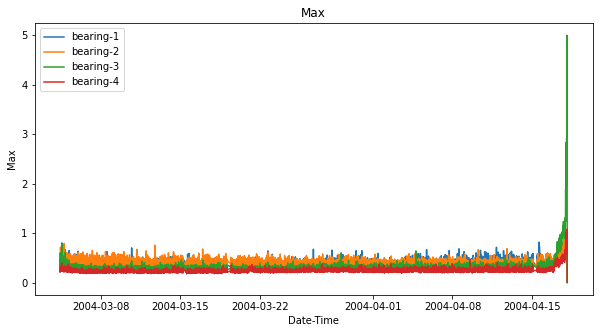

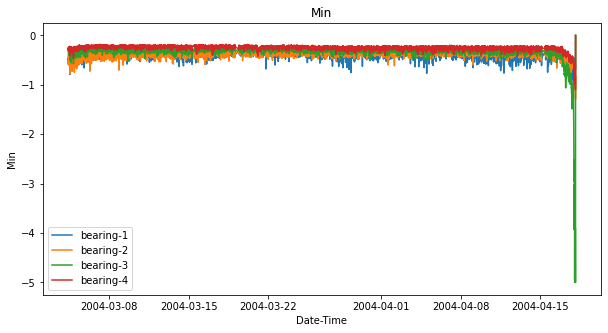

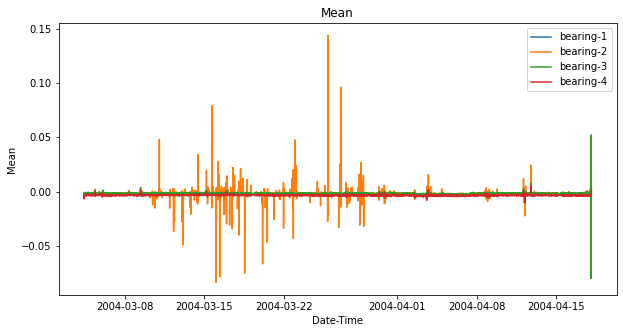

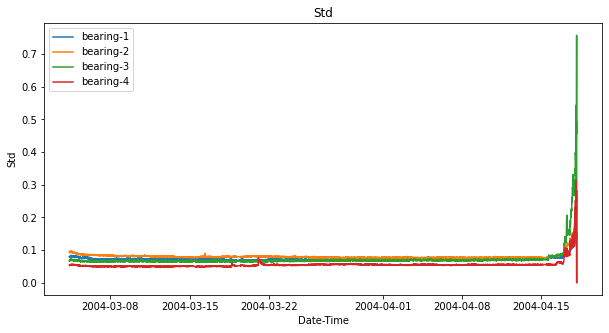

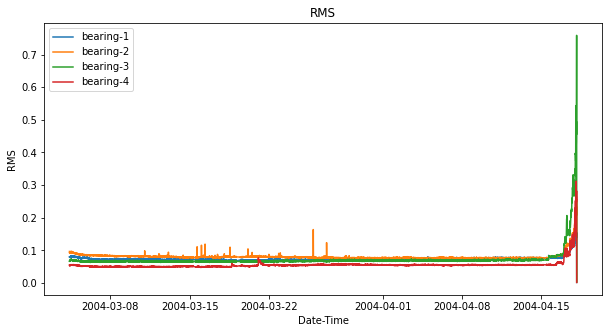

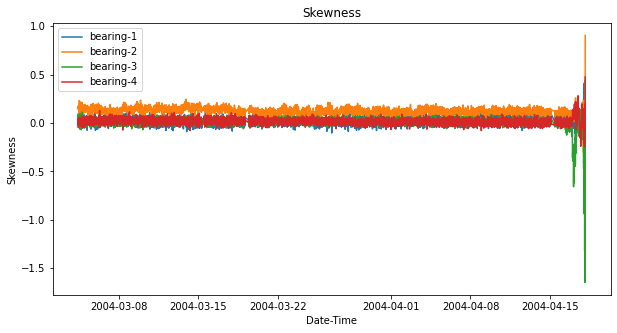

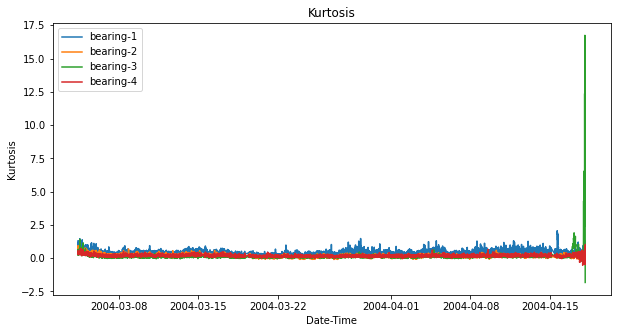

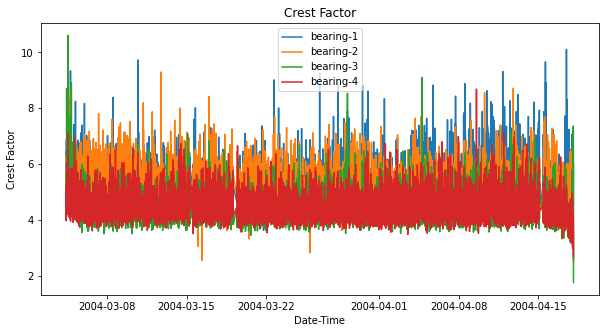

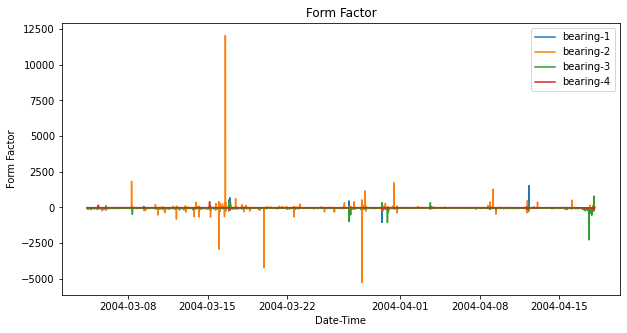

In [64]:
test_no=3

df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_{}.csv".format(test_no),index_col='Unnamed: 0')

df1.index = pd.to_datetime(df1.index)

for i,col in enumerate(df1.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()


# Saving Outer Race Fault

In [65]:
df3

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.361,-0.310,-0.005148,0.066192,0.066390,0.083449,0.591902,5.437565,-12.896399
2004-03-04 09:32:00,0.295,-0.295,-0.006310,0.065986,0.066285,0.011828,0.359751,4.450449,-10.505622
2004-03-04 09:42:00,0.286,-0.286,-0.001293,0.069176,0.069186,0.049056,0.213724,4.133782,-53.519544
2004-03-04 09:52:00,0.349,-0.310,-0.002280,0.068600,0.068637,0.002209,0.299035,5.084751,-30.099513
2004-03-04 10:02:00,0.388,-0.374,-0.001727,0.067449,0.067469,0.031884,0.395754,5.750781,-39.058344
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,3.167,-5.000,0.017613,0.495062,0.495363,-1.648364,16.742241,6.393285,28.124430
2004-04-18 02:12:00,2.378,-3.899,-0.002114,0.454472,0.454466,-0.656841,5.707273,5.232514,-214.967877
2004-04-18 02:22:00,4.346,-5.000,-0.079840,0.584635,0.590047,-0.426006,12.660025,7.365514,-7.390347
2004-04-18 02:32:00,4.998,-5.000,0.052137,0.756990,0.758765,-0.220131,7.058920,6.587018,14.553238


In [66]:
df_orf=df3['2004-04-15 12:32:00':'2004-04-18 00:42:00']
fault=[]
for i in range (0,len(df_orf)):
    fault.append('Outer Race')

df_orf['Fault']=fault

df_orf.to_csv('outer_race_fault_test_3.csv',index=False)  
df_orf

C:\Users\Manas Rane\AppData\Local\Temp\ipykernel_19712\1502110747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orf['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-04-15 12:32:00,0.315,-0.300,-0.002260,0.071999,0.072032,-0.017350,0.161074,4.373034,-31.867085,Outer Race
2004-04-15 12:42:00,0.278,-0.320,-0.000929,0.071960,0.071965,-0.020822,0.203632,3.863014,-77.468263,Outer Race
2004-04-15 12:52:00,0.403,-0.300,-0.001721,0.071967,0.071986,0.009853,0.275335,5.598312,-41.838775,Outer Race
2004-04-15 13:02:00,0.334,-0.332,-0.001242,0.070479,0.070488,0.037436,0.131765,4.738400,-56.769549,Outer Race
2004-04-15 13:12:00,0.295,-0.334,-0.002482,0.072242,0.072283,-0.030286,0.181303,4.081162,-29.120361,Outer Race
...,...,...,...,...,...,...,...,...,...,...
2004-04-18 00:02:00,2.280,-3.936,-0.001821,0.394083,0.394077,-0.416217,6.095530,5.785668,-216.407494,Outer Race
2004-04-18 00:12:00,1.750,-3.423,-0.002377,0.395931,0.395928,-0.664070,3.988261,4.419990,-166.549208,Outer Race
2004-04-18 00:22:00,2.202,-3.013,-0.004019,0.384375,0.384387,-0.150122,2.377175,5.728602,-95.651873,Outer Race
2004-04-18 00:32:00,1.824,-3.335,-0.003547,0.373875,0.373883,-0.408740,4.726666,4.878529,-105.403295,Outer Race
